## 4장 요약 - 지역 특징 검출

### ex) 대응점 찾기 문제.
<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/semina3/resource/correspondence.PNG" width="600" height="750">
파노라마 영상을 만드려면 두 영상에서 서로 대응하는 점을 찾아야 한다.

3단계를 거쳐서 찾을 수 있다.
- 검출 detection (4장) : 특징점의 위치를 알아내는 단계
- 기술 describe (6장) : 특징점의 주변을 보고 속성을 알아내는 단계
- 매칭 matching (7장) : 특징점 중 대응점을 찾는 방법.

----

### 지역 특징(local feature)

1. 영상의 다른 곳과 두드러지게 달라서 풍부한 정보를 추출 할 수 있는 '특징점' 이 local feature 다.

    또한, 다른 영상에서도 반복적으로 검출되어야 한다.이를 물리적인 코너 검출이라고도 한다.
    
    -

2. edge map에는 edge강도와 edge방향 뿐이라 매칭될 만큼 풍부하지 않다.

    그래서 local feature는 명암영상에서 직접 추출한다.
    
    -
    
3. 지역 특징은 <위치, 스케일, 방향, 특징벡터>로 이루어짐.

    검출 단계에서 <위치, 스케일>을 알아내고,
    
    기술 단계에서 <방향, 특징벡터>를 알아내야한다.
    
    이때, 특징벡터가 스케일,방향에 불변(invariant)해야한다. matching시에 특징벡터를 이용하기 때문.


----
### 검출의 원리
<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/semina3/resource/local_feature.PNG" width="600" height="750">

a 처럼 여러 방향으로 밝기 변화가 발생하면, 다른영상에서도 찾기가 쉽다.

----
## 1. 이동과 회전에 불변한 특징점 검출


### 1-1. 모라벡 알고리즘 (Moravec80)

<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/semina3/resource/moravec.PNG" width="150" height="150">

a와 같이 여러방향 밝기 변화가 생긴다면, 높은 값을 부여하는 함수를 제시.

---

#### 제곱차의합 (SSD sum of squared difference)

<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/semina3/resource/ssd1.PNG" width="450" height="400">

- w : 박스 마스크로, 특징점 주변만 계산에 참여하기 위한것.

- f : 입력영상.

f(y+v,x+u) 특징점 주변에서, 특정 방향으로 shift 시켰을때 영상

특징점 주변과 바깥의 차이를 계산한것.

각 a,b,c점에서 S(-1,-1)~ S(1,1)까지 다 계산 했을 경우.

<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/semina3/resource/S_map.PNG" width="400" height="400">


---

#### S맵으로, 특징 가능성 계산.

앞으로, ( C : 특징 가능성 )이다.


<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/semina3/resource/moravec_function.PNG" width="450" height="450">

모라벡은, 동서남북 4방향 모두 변화가 일어나야 특징점이라 봤다. 그래서 최솟값으로 계산.

하지만, 현실 세계의 잡음 처리 . 동서남북 4방향 충분한가? 대각선 방향의 변화를 알 수 없다.


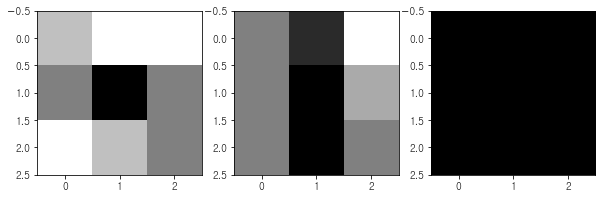

In [136]:
#모라벡 알고리즘 
#위 s 맵의 이미지화
import numpy as np

img1=np.array([[3,4,4],[2,0,2],[4,3,2]])
img2=np.array([[3,1,6],[3,0,4],[3,0,3]])
img3=np.array([[0,0,0],[0,0,0],[0,0,0]])

fig =plt.figure(figsize=(10,10))

plt.subplot(231)# 3행 3열중 1번째
plt.imshow(img1,'gray')

plt.subplot(232)# 3행 3열중 1번째
plt.imshow(img2,'gray')

plt.subplot(233)# 3행 3열중 1번째
plt.imshow(img3,'gray')

plt.show()

#a가 특징점 주변과 동서남북 차이가 나고
#b는 좌우만 차이가 난다.
#c는 같다.

----
### 1-2. 해리스 코너 (Harris corner) [Harris88]

1차 미분을 이용해, 여러 방향 반영한 코너(특징점)을 찾는 방법.

#### 가중치 제곱의 합 WSSD (Weighted Sum of Squared Difference)

SSD 식에서 박스 마스크 대신, 중심에서 멀어질수록 서서히 값이 작아지는 가우시안 마스크로 대치.

이로써, 노이즈에는 대처할 수 있다.

- 가중치 제곱의 합 WSSD (Weighted Sum of Squared Difference)

<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/semina3/resource/harris_corner_first.PNG" width="450" height="400">

하지만, 여전히 u와 v는 정수값이어야 하기에, 여러 방향의 변화를 알 수 없다.

<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/semina3/resource/harris_corner_taylor.PNG" width="550" height="500">

테일러 전개를 해주면

이제 u와 v가 f의 바깥으로 전개되어, 실수여도 된다. 여러방향의 변화를 알 수 있다.

이때 제곱식을 풀면 행렬로 변환할 수 있다.

<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/semina3/resource/harris_corner_sigma.PNG" width="550" height="500">


이 연산은 컨볼루션과 같다.(???)

<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/semina3/resource/harris_corner_result.PNG" width="550" height="500">




#### 2차 모멘트 행렬(second moment matrix)

<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/semina3/resource/harris_corner_A.PNG" width="250" height="200">

행렬 A는 자가 공관계(auto-correlation) 행렬이라고도 한다.

행렬 A는 u와 v와 분리 됬기에, 현재 (y,x)일 때 '영상 구조'를 말해준다.

이 행렬 덕분에, S(u,v)를 구하지 않고도 특징가능성(C)을 측정할 수 있다.

특징은 det(A) = λ1 x λ2 . trace(A) = λ1+λ2 라는것.
(람다:고유값)

#### 특징 가능성 측정

<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/semina3/resource/moment_table.PNG" width="550" height="600">

고유값에 따라, 세 점의 특징을 분류 할 수 있다.
- a와 같이 고유값이 둘다 크면, 여러 방향의 변화가 있는 지점.
- b와 같이 한 고유값이 작으면, 한 방향으로만 변화가 있는 edge 화소.
- c처럼 0이면, 변화가 없는 지점.

이에 따라, harris이 특징 가능성 C를 유도 했다.

<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/semina3/resource/harris_corner_c1.PNG" width="250" height="300">

하지만, 고유값을 항상 계산하는것은 계산이 느리다.

위에서 찾았던 특징을 통해, 개선.

<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/semina3/resource/harris_corner_c2.PNG" width="450" height="500">


<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/semina3/resource/harris_corner_deer.PNG" width="350" height="400">

C > 0.02 임계값으로 찾은것.

1. 코너들만 검출되는 것이 아니다. 눈 지점도 검출. corner가 아니라 특징점이라 해야한다.
2. 주변 지점에 특징점이 퍼져있다. 같은 특징점이 겹친다고 생각됨. localization(비최대억제)가 필요.

----
```python

cv2.cornerHarris(src,blockSize,ksize,k[,dst[,borderType]])

- src : gray Scale의 float32 타입 이미지
- blockSize : window(커널) size
- ksize : 소벨 연산시 사용되는 커널의 크기
- k : 특징 가능성 추정시 사용되는 상수. 보통 0.04로 사용

```

잎사진 : 특징점 수 38005
가우디 사진 : 특징점 수 44195


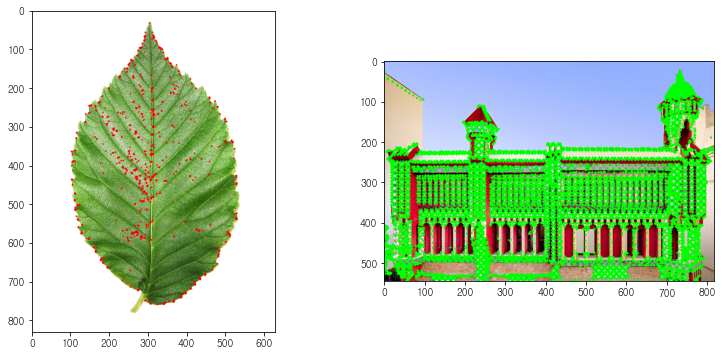

In [124]:
#ex) 해리스 코너
import cv2
import numpy as np
from matplotlib import pyplot as plt


img = cv2.imread("../data/leaf.png") # gray scale로 읽어서, 1 채널 명암값에 필터를 적용한다.
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

img2 = cv2.imread("../data/hough_example.jpg") # gray scale로 읽어서, 1 채널 명암값에 필터를 적용한다.
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)


gray = np.float32(gray)
dst = cv2.cornerHarris(gray,3,3,0.04) #C 값을 구하는 과정

gray2 = np.float32(gray2)
dst2 = cv2.cornerHarris(gray2,3,3,0.04) #C 값을 구하는 과정


#img[dst>0.01*dst.max()] = [0,0,255] # 임계값 설정.

print("잎사진 : 특징점 수",np.sum(dst>0.01*dst.max()))
coord_y=np.where(dst>0.07*dst.max())[0]
coord_x=np.where(dst>0.07*dst.max())[1]
for x,y in zip(coord_x,coord_y):
    cv2.circle(img,(x,y), 2,(0,0,255) ,-1 ) #임계값 설정 및 표시 (c가 0.07*최대값보다 커야지 특징점)




print("가우디 사진 : 특징점 수",np.sum(dst2>0.01*dst2.max()))
coord_y=np.where(dst2>0.01*dst2.max())[0]
coord_x=np.where(dst2>0.01*dst2.max())[1]
for x,y in zip(coord_x,coord_y):
    cv2.circle(img2,(x,y), 2,(0,255,0) ,-1 ) #임계값 설정 및 표시 (c가 0.01*최대값보다 커야지 특징점)
#img[img==[0,0,0]] = [255,0,0]

img= cv2.cvtColor(img, cv2.COLOR_BGR2RGB)#PLOT 출력위해
img2= cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)#PLOT 출력위해

fig =plt.figure(figsize=(13,13))

plt.subplot(221)# 3행 3열중 1번째
plt.imshow(img)

plt.subplot(222)# 3행 3열중 1번째
plt.imshow(img2)

plt.show()

----
### 1-3. 2차 미분을 사용하는 방법

앞에서는 1차 도함수와 2차 모멘트 행렬 이용.

해시안 행렬(hessian matrix)를 이용해서 검출.

<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/semina3/resource/hessian.PNG" width="250" height="300">


잡음 증폭 되기에, 가우시안 스무딩후, 2차 미분.

<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/semina3/resource/hessian_gaussian.PNG" width="450" height="500">

이 방법은 c를 구하는 방법이 두가지다.

행렬식과 trace( 이때는 LOG와 같은 값) 를 통해서 특징 가능성 값을 구할 수도 있다.

<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/semina3/resource/hessian_c.PNG" width="450" height="500">

하지만, 에지가 민감하게 검출됨.

---
### 1-4. 슈산 (SUSAN) (Smallest Univalue Segment Assimilating)

이 방법은 미분을 사용하지 않는다. 

현재 처리중인 중심점과 인근 지역이 밝기 값이 얼마나 유사한가를 따져보고 그 결과에 따라 특징 가능성을 측정.

<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/semina3/resource/susan.PNG" width="200" height="200">

#### 우산 USAN(Univalue Segment Assimilating Nucleus)
중심점과 주변영역이 명암값이 유사한 정도.

c의 우산 비율 : 100%

b의 우산 비율 : 50% -> 에지 검출

a의 우산 비율 : 50% 이하 -> 특징점 검출.;


#### 우산 비율 측정과 특징가능성 계산

<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/semina3/resource/usan_area.PNG" width="300" height="300">

r: 원형 마스크내 화소

r0: 중심점

r화소 r0 화소의 차이가 임계값 t1보다 작으면 넓이로 계산.


usan_area를 특징 가능성으로 변환.

<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/semina3/resource/usan_c.PNG" width="300" height="300">

q: 원형 마스크의 넓이* 0.75이다.

<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/semina3/resource/usan_circle.PNG" width="300" height="300">



---
## 2.위치 찾기 알고리즘

수식들을 적용해서 특징 가능성 맵을 구할 수 있다.

<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/semina3/resource/localization.png" width="600" height="750">

4-9(a)를 보면, 한 점만 큰것이 아니라 일정한 범위에 퍼져있다. 해당 영역에서 한점을 택하는 방법이 필요하다.

이를 localization 이라 한다.

#### 비최대 억제 (non-maximum suppression)
특징 가능성 맵에서. 자신의 주변 이웃 화소보다 크면 특징점이 되고. 아니면, 억제된다.

4 이웃만 보는 4-연결 방식의 경우.

<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/semina3/resource/localization_algorithm.png" width="600" height="750">


BROWN은 특징점이 영상의 특정부분에 밀집되고, 다른 부분은 희소하게 분포한다는 문제를 인지.

어떤 점이 특징점이 되려면 지역 최대일뿐만 아니라, 주위 화소보다 일정비율 커야한다는 조건 추가.

적응적 비최대 억제 방법(adaptive non-maximm suppression)을 제안.[Brown2005]



잎사진 특징점 수 :  517
가우디 사진 특징점 수 :  6477


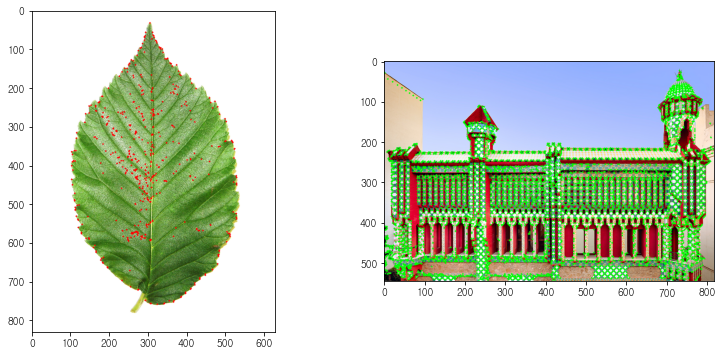

In [125]:
# ex) harris corner and localization
# 해리스 코너 결과에 비최대억제 수행.
import cv2
import numpy as np
from matplotlib import pyplot as plt

count=0
count2=0

img = cv2.imread("../data/leaf.png") # gray scale로 읽어서, 1 채널 명암값에 필터를 적용한다.
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

img2 = cv2.imread("../data/hough_example.jpg") # gray scale로 읽어서, 1 채널 명암값에 필터를 적용한다.
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)


gray = np.float32(gray)
dst = cv2.cornerHarris(gray,3,3,0.04) #C 값을 구하는 과정

gray2 = np.float32(gray2)
dst2 = cv2.cornerHarris(gray2,3,3,0.04) #C 값을 구하는 과정



# 비최대억제
for y in range(dst.shape[0]-1):
    for x in range(dst.shape[1]-1):
        temp = dst[y,x]
        if temp>0.07*dst.max() and (temp > dst[y,x-1]) and (temp>dst[y,x+1]) and (temp>dst[y-1,x]) and (temp>dst[y+1,x]):
            count=count+1
            cv2.circle(img,(x,y), 2,(0,0,255) ,-1 )
            #img[y,x]=[0,255,0]

print("잎사진 특징점 수 : ", count)
img_rgb= cv2.cvtColor(img, cv2.COLOR_BGR2RGB)#PLOT 출력위해


# 비최대억제
for y in range(1,dst2.shape[0]-1):
    for x in range(1,dst2.shape[1]-1):
        temp = dst2[y,x]
        if temp>0.01*dst2.max() and (temp > dst2[y,x-1]) and (temp>dst2[y,x+1]) and (temp>dst2[y-1,x]) and (temp>dst2[y+1,x]):
            count2=count2+1
            cv2.circle(img2,(x,y), 2,(0,255,0) ,-1 )
            #img[y,x]=[0,255,0]

print("가우디 사진 특징점 수 : ", count2)
img_rgb2= cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)#PLOT 출력위해





fig =plt.figure(figsize=(13,13))

plt.subplot(221)# 2행 2열중 1번째
plt.imshow(img_rgb)

plt.subplot(222)# 2행 2열중 2번째
plt.imshow(img_rgb2)


plt.show()

---
#### 이동과 회전
<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/semina3/resource/moravec.PNG" width="150" height="150">

<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/semina3/resource/rotate.PNG" width="400" height="550">

영상에서 회전은 선형 보간기법 이용.

회전을 해도, 똑같이 검출될 수 있다. 회전에 invariant이다.

#### 스케일 변환
슈산 알고리즘의 예로, 스케일을 축소한다면. 정확히 검출할 수가 없다.

<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/semina3/resource/scale_triangle.PNG" width="300" height="300">

앞의 알고리즘은 모두 연산자의 크기가 같다. 스케일 변화에 따른 대처 능력이 없다. 스케일 불변이 아니다.

----
## 3. 스케일에 불변한(scale-invariant) 특징점 검출

### 3-1. 스케일 공간.

큰 영상에는 큰 연산자 작은 영상에는 작은 연산자를 사용하면, 비슷한 특징을 얻을 수 있다.

하지만, 우리는 영상의 스케일을 모른다.

위와 같은 문제를 해결하기 위해 생각할 수 있는방법

1. 연산자를 작은크기에서 시작해 점점 키워가며, 영상에 반복 적용하여 여러 스케일 특징 집합 얻기.

2. 영상의 해상도를 점점 줄여 다중 스케일 영상을 구축하고, 동일한 크기의 연산자를 여러 스케일에 적용하여 특징 얻기.


하지만, 잘 작동하지 않음. 비슷한 특징이 여러 스케일에 걸쳐 나타날 수 있으므로 부정확한 특징쌍이 찾아질 가능성이 높다.

( 비슷한 특징점이 검출됬다고, 다 특징점이 아니란 뜻? )

좋은 해법은 스케일에 불변한(scale-invarinat) 특징을 찾는 것.


### 다중 스케일 접근방법

<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/semina3/resource/multiscale_algorithm.PNG" width="500" height="600">


즉, 위의 2번째 해법과 다른점은 연산자로 특징얻는것 뿐 아니라, 극점을 찾는것.

1. 어떻게 multi-scale 영상을 구축할 것인가?
2. M으로부터 스케일 불변성을 만족하는 특징을 찾을 것인가?


#### 과정1. 다중 스케일(multi-scale) 영상 구축

<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/semina3/resource/multiscale.PNG" width="600" height="750">

1. 가우시안 스무딩 : 멀어지면 흐릿해지는 원리 이용. σ는 연속공간에 정의되어, 임의의 스케일에 대처 가능.

2. 피라미드 : 영상의 해상도를 반씩 줄여나간다. 이산적이라 한계

t = 가우시안 스무딩의 분산.이라 하면, 3차원 공간이 된다.

<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/semina3/resource/multiscale2.PNG" width="450" height="600">

####  과정 2. 3차원 공간. local 극점 검출.

<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/semina3/resource/blob.PNG" width="150" height="200">

위의 두개 blob에서, 중심점 (y,x)를 특징점 검출방법으로 찾았다고 가정.(이것은 (y,x)공간에서 극점(특징점))

multi scale영상을 만들기위해, 가우시안 스무딩 연산과 극점 검출이 필요하다.

- (x,y,t) 공간에서 극점을 찾을 식, 정규 라플라시안(normalized Laplacian)

<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/semina3/resource/normalized_laplacian.PNG" width="300" height="500">

라플라시안을 이용하여, y와 x방향의 변화가 큰 곳(극점)을 찾기 위한 식. 

LOG에 분산을 곱한것으로, 가우시안 커널의 시그마가 커질수록 미분값이 낮아지는것을 막기위해서.

결과, 식값은 양수로만 주어진다.

이때 BLOB 영상의 t축(스케일)을 변화시켜 극점을 찾으면.

<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/semina3/resource/normalized_laplacian2.PNG" width="550" height="700">

blob1 size : blob2 size = σ1 (스케일 1): σ2 (스케일 2) 을 알 수 있다.

즉, blob이 1.5배 커짐에 따라 스케일도 1.5배 커져야 극점을 가지게 됨.

이로써, 물체의 스케일이 변해도 가우시안 스케일을 조절하면, 극점를 찾을 수 있음을 알게됨.(?? 이것을 알아내기 위한 실험이었나?)

아직, (y,x)공간에서 극점을 찾는 방법은 제시가 안됨.


### 3-2. 해리스 라플라스 특징 검출(harris laplace )

- 해리스 코너

    (y,x) 공간에서 극점 탐색.
    
    ---
- 해리스 라플라스

    (y,x,t) 공간에서 스케일에 관계없이 검출되는, 극점을 탐색.
    
---
검출하는 방법은

1. 영상 스케일을 변경해가며, (y,x) 공간에서 해리스 코너 검출 방법으로 극점 탐색.

    <img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/semina3/resource/harris_corner_result.PNG" width="400" height="500">

2. 정규라플라시안을 이용해, 1번에서 검출한 (y,x,t)에서, t의 주변에서도 극점인지 판별.

---
#### 과정 1. 2차 모멘트 행렬의 스케일 공간 확장. ( 스케일 공간에서 지역 극점 수집하기.)
해리스 코너의 2차 모멘트 행렬은 단일 스케일에서만 정의 되었다.

<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/semina3/resource/harris_laplace_A.PNG" width="400" height="500">

2차 모멘트 행렬에, σD 스케일을 조절하여 영상을 만들 수 있도록 함.

그리고, 분산을 곱하여 정규화 해줌. ( σi 크기의 가우시안 스무딩을 다시했는데 왜?? )

<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/semina3/resource/harris_laplace_c.PNG" width="400" height="500">

이를 통해서 (y,x)에서 특징가능성 값을 구함.

#### 과정 2.  스케일 선택 (극점 미세조정)

과정1에서 찾은 극점들을 미세조정 하는 단계.

스케일축에 국한하여, 앞에서 찾은 σD 주변에서 극점이 있는지 판별.(없으면 버린다.)

스케일축에 극점이 있다면, 다시 (y,x) 공간에서 다시 극점을 찾는다.


<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/semina3/resource/harris_laplace_algorithm.PNG" width="500" height="700">


---

- 단점

과정1과 과정2 에서 σ를 증가시키며 가우시안 컨볼루션 연산이 많이 수행된다.

과정 2는 모든 특징점에 대해서,  σ를 촘촘히 증가시키기에 더 많이 수행된다.

계산시간이 부담된다.


In [ ]:
#ex) harris_laplacian

### 3-3. SIFT (Scale-Invariant Feature Transform) 검출

지역 특징 검출시 반복성이 가장 높고, 속도가 빠른 검출 방법. 

SIFT 검출은, 스케일 공간이 피라미드와 가우시안으로 구성된다.

<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/semina3/resource/sift1.PNG" width="500" height="600">


옥타브(OCTAVE) : 가우시안 스무딩한 6장의 묶음.

OCTAVE의 4번째 영상 에서 다운 샘플링을 통해, 피라미드를 구성한다. 다운샘플링은 영상이 4X4 가 될때까지 수행.

#### 특징점 검출 방법

---
##### 과정1. DOG(Difference of Gaussian) 피라미드 구성
6장씩, 구해진 OCTAVE에서 똑같이 정규라플라시안을 구해서 특징점을 검출할 수 있다.

하지만, DOG(Difference of Gaussian)을 이용해, 정규 라플라시안을 근사할 수 있다.

<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/semina3/resource/dog1.PNG" width="400" height="300">


<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/semina3/resource/dog2.PNG" width="400" height="300">

같은 옥타브의 두 위아래 이미지를 빼주면, 정규라플라시안 이미지를 구할 수 있다.

---
##### 과정 2. DOG 영상에서 극점 찾기.

이제 옥타브는 5장의 영상을 가진다.

이때 맨위, 맨아래 영상을 빼고 중간 3영상을 이용해 극점을 찾는다.

<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/semina3/resource/DOG3.PNG" width="400" height="500">

X로 표시된 화소가 나머지 26개의 점에 비해, 최소 또는 최대가 되면 극점, 특징점 판별.

그리고, 임계값을 넘으면, KEY POINT라 함.

검출된 특징은

<y,x,o,i> 정보를 가진다. o는 옥타브 번호, i는 DOG 번호이다.
```
미세조정 과정
특징점을 중심으로 테일러 전개
부분화소 정확도 까지 미세 조정
```
미세조정 결과 <y',x',o,i'>



---
#### 과정3. 옥타브 0 영상으로 변환

특징점 정보를 원래영상  옥타브 0 영상으로 변환해야한다.

<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/semina3/resource/sift_convert.PNG" width="400" height="500">

위치 (y,x) 로 옥타브 값을 이용해 바꾸고

스케일 s. (스케일 s일때의 특징점이란 뜻인가??)

---
```
추출기 생성함수

detector = cv2.xfeatures2d.SIFT_create(nfeatures, nOctaveLayers, contrastThreshold, edgeThreshold, sigma)

- nfeatures : 검출 최대 특징 수
- nOctaveLayers : 이미지 피라미드에 사용할 계층 수.
- contrastThreshold : 특징 값 threshold
- edgeThreshold : edge threshold
- sigma : 옥타브의 첫번째 이미지의 가우시안 커널 시그마 값.

#키 포인트 추출 및 descriptor 계산
keypoints, desc = surf.detectAndCompute(gray, None)

```



원본 keypoint 수 :  82
1/2 사이즈 keypoint 수 :  36


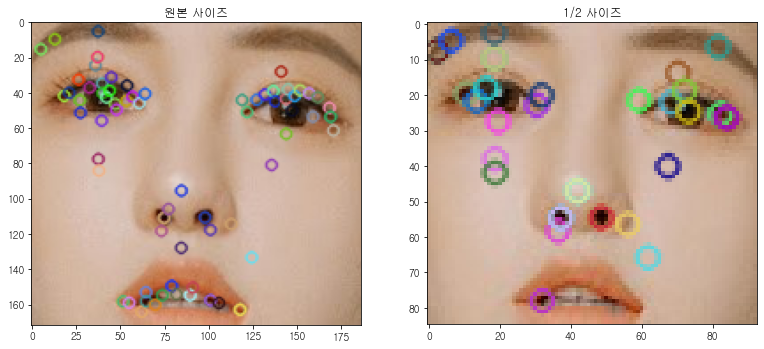

In [2]:
# ex) sift 검출.
#https://bkshin.tistory.com/entry/OpenCV-27-%ED%8A%B9%EC%A7%95-%EB%94%94%EC%8A%A4%ED%81%AC%EB%A6%BD%ED%84%B0-%EA%B2%80%EC%B6%9C%EA%B8%B0-SIFT-SURF-ORB
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)


import cv2
import numpy as np
from matplotlib import pyplot as plt


img = cv2.imread("../data/face_model.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

img2 = cv2.imread("../data/face_model_small.jpg")
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)


#SIFT 추출기 생성
sift = cv2.xfeatures2d.SIFT_create() #default

#keypoint 검출
keypoints,descriptor = sift.detectAndCompute(gray, None)
print("원본 keypoint 수 : ", len(keypoints))

keypoints2,descriptor2 = sift.detectAndCompute(gray2, None)
print("1/2 사이즈 keypoint 수 : ", len(keypoints2))

#키포인트 그리기
img_draw = cv2.drawKeypoints(img, keypoints, None,flags=cv2.DRAW_MATCHES_FLAGS_DEFAULT)
img_draw2 = cv2.drawKeypoints(img2, keypoints2, None,flags=cv2.DRAW_MATCHES_FLAGS_DEFAULT)



# cv2.DRAW_MATCHES_FLAGS_DEFAULT : 특정한 위치만을 표현하는 작은 크기의 원

img_rgb= cv2.cvtColor(img_draw, cv2.COLOR_BGR2RGB)#PLOT 출력위해
img_rgb2= cv2.cvtColor(img_draw2, cv2.COLOR_BGR2RGB)#PLOT 출력위해

fig =plt.figure(figsize=(13,13))

plt.subplot(221),plt.title("원본 사이즈")# 2행 2열중 1번째
plt.imshow(img_rgb)

plt.subplot(222),plt.title("1/2 사이즈")# 2행 2열중 1번째
plt.imshow(img_rgb2)

plt.show()
